In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import pickle

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
dir = "../tmpo86sw7ay/storage/"

In [14]:
def load_artifact(targ_file:str):
    targ_path = os.path.join(dir,targ_file)

    with open(targ_path,'rb') as fp:
        test_artifact = pickle.load(fp)

    return test_artifact

In [15]:
def calculate_distribution_with_label(df, column_name): 
    labels = df['has_done_upselling'].unique()

    # Prepare figure
    fig, axes = plt.subplots(1, len(labels), figsize=(12, 5), sharey=True)

    for i, label in enumerate(labels):
        ax = axes[i]
        
        # Subset by label
        subset = df[df['has_done_upselling'] == label]
        
        # Calculate percentage distribution
        dist = subset[column_name].value_counts(normalize=True) * 100
        dist = dist.sort_index()
        
        # Plot bar chart
        bars = ax.bar(dist.index, dist.values, color=['skyblue', 'salmon'], edgecolor='black')
        
        # Annotate percentages on top
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')
        
        ax.set_title(f'has_done_upselling: {label}')
        ax.set_ylabel('Percentage')
        ax.set_xlabel(column_name)
        ax.set_xticks(range(len(dist.index)))
        ax.set_xticklabels(dist.index, fontsize=10)
        ax.set_ylim(0, max(dist.values) + 30)

    plt.suptitle(f'{column_name} distribution by Label (%)')
    plt.tight_layout()
    plt.show()

`core_data`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| customer_id            | Unique identifier for the customer                           |
| age                    | Age of the customer                                          |
| contract_lifetime_days | Total duration of the customer contract in days              |
| remaining_binding_days | Number of days left in the contract binding period - usual binding period is 2 years        |
| has_special_offer      | Indicates if the customer has a special offer      |
| is_magenta1_customer   | Indicates if the customer is part of the Magenta1 program - fedelty program    |
| available_gb           | Amount of mobile data included in the current tariff         |
| gross_mrc              | Gross monthly recurring charge (in euros)                    |
| smartphone_brand       | Brand of the customer’s smartphone                           |
| has_done_upselling     | Whether the customer has already done an upsell in the last 3 years      |


In [16]:
core_data = load_artifact("core_data")
core_data

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,703091,4.940940,51,972,-433,0,0,40,8.98,iPhone,0
1,790539,4.825288,35,1058,578,0,0,0,66.02,Samsung,0
2,109927,4.394731,38,663,406,0,0,50,34.18,iPhone,0
3,998446,1.813336,49,690,542,0,1,0,46.12,Samsung,0
4,833289,4.831174,47,343,-240,0,0,30,38.16,Samsung,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,269064,4.745457,77,1206,-695,1,0,40,44.80,Huawei,0
99996,225881,2.448629,97,1696,-321,0,0,30,24.90,iPhone,0
99997,586143,5.108769,83,1168,-390,0,0,None,15.61,Samsung,0
99998,576484,2.848063,85,1374,-74,0,0,50,24.90,iPhone,0


`usage_info`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| billed_period_month_d  | Billing period (monthly)                                     |
| has_used_roaming       | Indicates if roaming was used during the period            |
| used_gb                | Amount of mobile data used in the billing period (in GB)     |


In [17]:
usage_info = load_artifact("usage_info")
usage_info

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,703091,2024-04-01,0,0.2
1,703091,2024-05-01,0,0.2
2,703091,2024-06-01,0,0.2
3,703091,2024-07-01,0,0.8
4,790539,2024-04-01,0,0.2
...,...,...,...,...
399995,576484,2024-07-01,0,48.3
399996,144294,2024-04-01,0,29.9
399997,144294,2024-05-01,1,18.6
399998,144294,2024-06-01,0,37.7


`customer_interactions`

| Feature Name   | Description                                                              |
|----------------|--------------------------------------------------------------------------|
| customer_id    | Unique identifier for the customer                                       |
| type_subtype   | Category and subtype of the interaction (e.g., tariff change, billing)   |
| n              | Number of interactions of this type in the last 6 months                                |
| days_since_last| Number of days since the last interaction of this type                   |


In [18]:
customer_interactions = load_artifact("customer_interactions")
customer_interactions

,customer_id,type_subtype,n,days_since_last
0,5.451457,prolongation,3,152
1,2.342698,rechnungsanfragen,5,169
2,2.342698,prolongation,5,99
3,2.989125,produkte&services-tarifwechsel,2,73
4,3.795506,produkte&services-tarifdetails,1,174
...,...,...,...,...
63280,1.946210,rechnungsanfragen,1,172
63281,2.147264,prolongation,1,119
63282,2.147264,rechnungsanfragen,2,88
63283,2.162399,produkte&services-tarifdetails,1,62


# Exploratory Data Analysis

## Main Stats

### Null Values check

In [19]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rating_account_id       100000 non-null  int64  
 1   customer_id             100000 non-null  object 
 2   age                     100000 non-null  int64  
 3   contract_lifetime_days  100000 non-null  int64  
 4   remaining_binding_days  100000 non-null  int64  
 5   has_special_offer       100000 non-null  int64  
 6   is_magenta1_customer    100000 non-null  int64  
 7   available_gb            85583 non-null   object 
 8   gross_mrc               100000 non-null  float64
 9   smartphone_brand        100000 non-null  object 
 10  has_done_upselling      100000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


### Duplicate check

In [20]:
core_data.duplicated().any()

np.False_

### Unique customer check

In [21]:
core_data['customer_id'].nunique()

58558

### Label distribution

In [22]:
label_percentages = core_data['has_done_upselling'].value_counts(normalize=True) * 100
label_percentages

has_done_upselling
0    92.991
1     7.009
Name: proportion, dtype: float64

In [23]:
labels = core_data['has_done_upselling'].value_counts()
labels

has_done_upselling
0    92991
1     7009
Name: count, dtype: int64

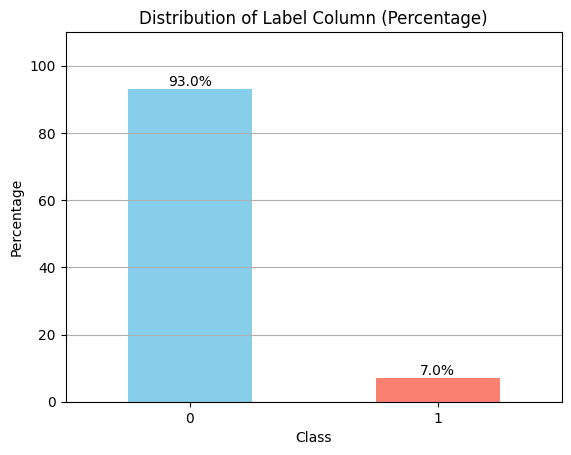

In [24]:
label_distribution = core_data['has_done_upselling'].value_counts(normalize=True) * 100

# Plot
label_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Label Column (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)

# Annotate bars with values
for i, val in enumerate(label_distribution):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.ylim(0, 110)
plt.grid(axis='y')
plt.show()


### Linear correlation with label

In [25]:
correlation_with_label = core_data.corr(numeric_only=True)['has_done_upselling'].sort_values(ascending=False)
print(correlation_with_label)

has_done_upselling        1.000000
is_magenta1_customer      0.035343
contract_lifetime_days    0.007789
rating_account_id         0.006884
has_special_offer         0.003155
gross_mrc                -0.023504
remaining_binding_days   -0.026284
age                      -0.046060
Name: has_done_upselling, dtype: float64


### Age band distribution

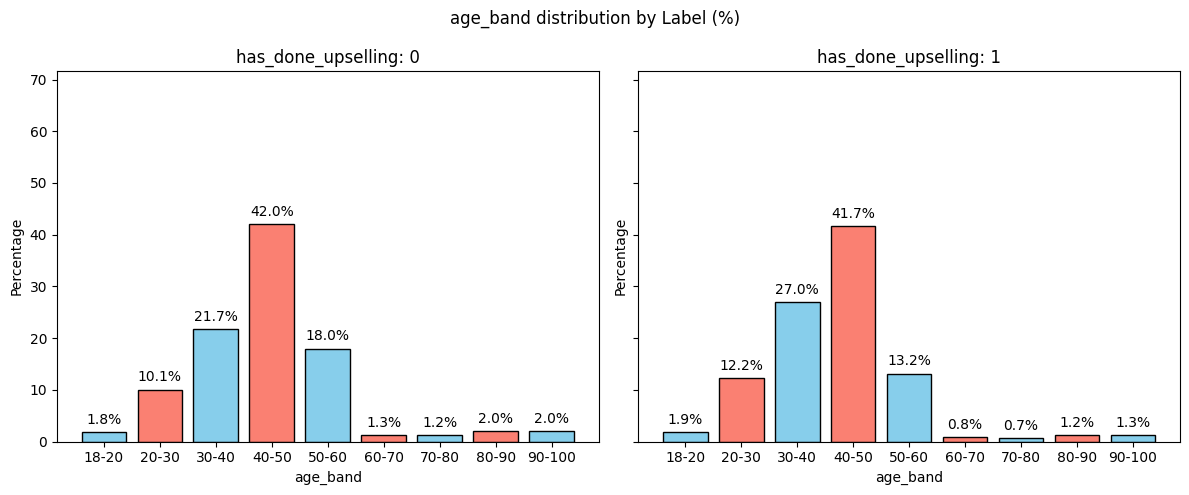

In [26]:
conditions_age = [
    (core_data['age'] >= 18) & (core_data['age'] < 20),
    (core_data['age'] >= 20) & (core_data['age'] < 30),
    (core_data['age'] >= 30) & (core_data['age'] < 40),
    (core_data['age'] >= 40) & (core_data['age'] < 50),
    (core_data['age'] >= 50) & (core_data['age'] < 60),
    (core_data['age'] >= 60) & (core_data['age'] < 70),
    (core_data['age'] >= 70) & (core_data['age'] <= 80),
    (core_data['age'] >= 80) & (core_data['age'] <= 90),
    (core_data['age'] >= 90) & (core_data['age'] <= 100)
]

choices_age = ['18-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

core_data['age_band'] = np.select(conditions_age, choices_age, default='Unknown')

calculate_distribution_with_label(core_data, 'age_band')

### Is magenta1 customer distribution

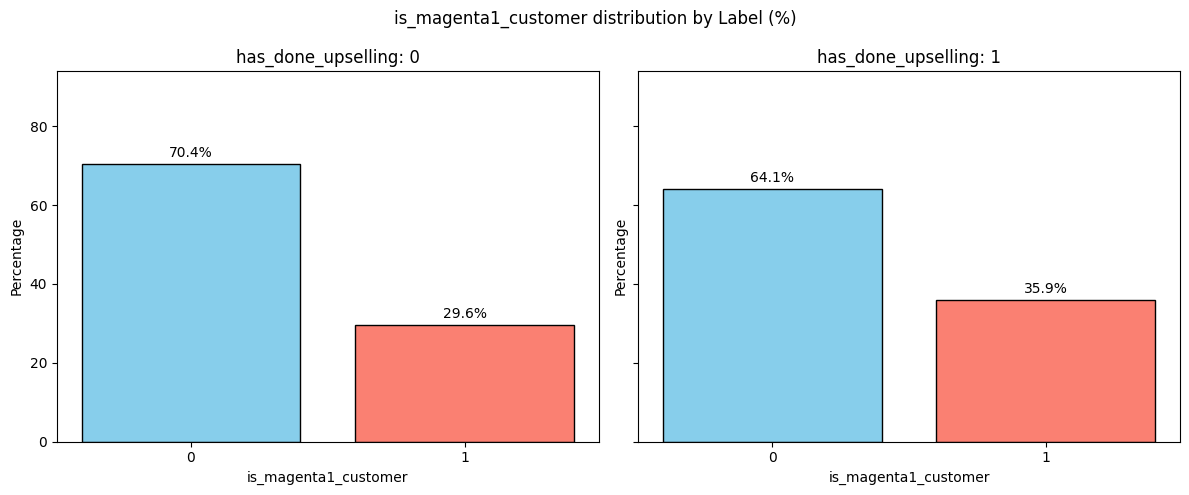

In [27]:
calculate_distribution_with_label(core_data, 'is_magenta1_customer')

### Has special offer distribution

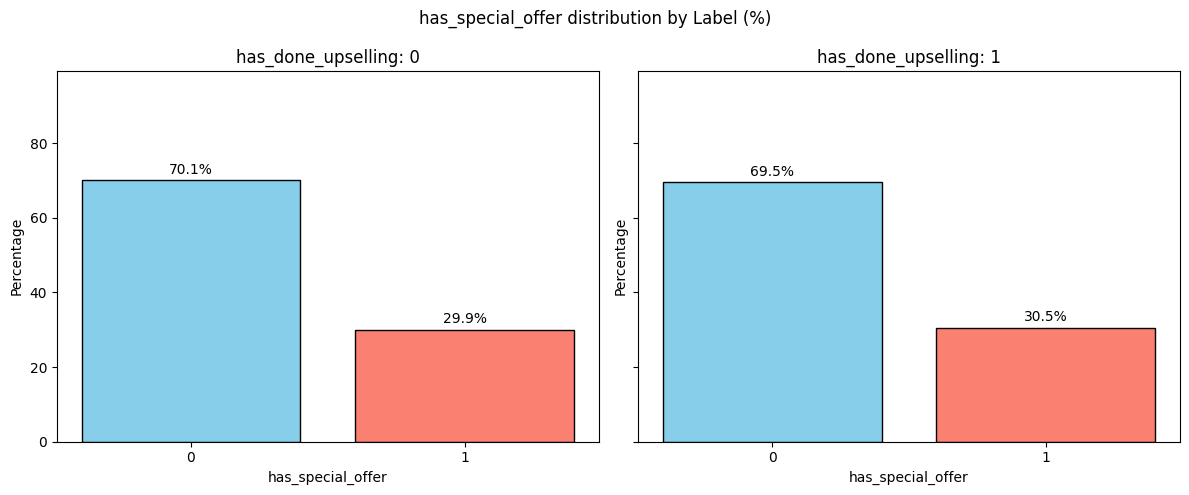

In [28]:
calculate_distribution_with_label(core_data, 'has_special_offer')

### Remaining binding days distribution

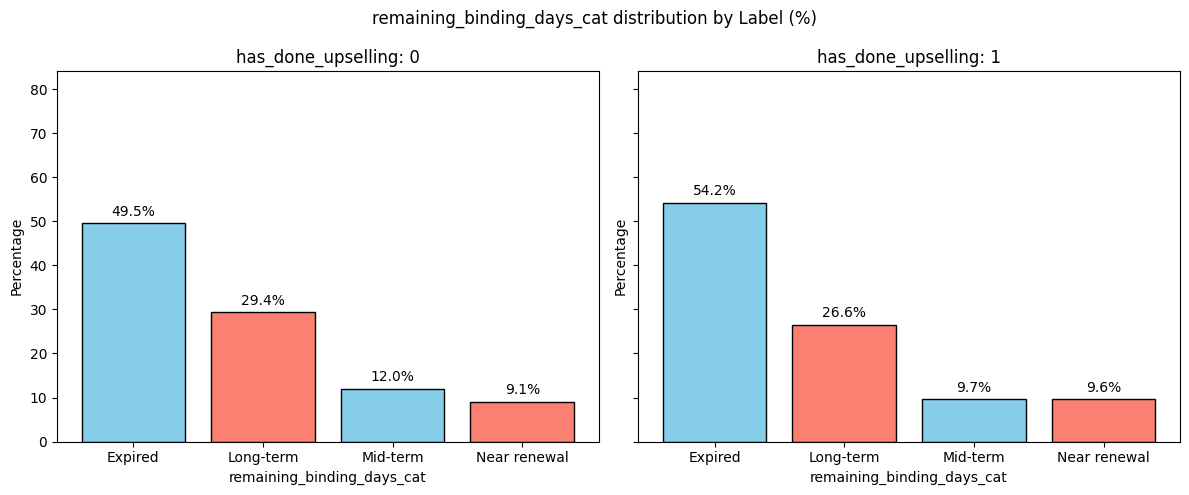

In [29]:
conditions_rbd = [
    (core_data['remaining_binding_days'] <0),
    (core_data['remaining_binding_days'] >= 0) & (core_data['remaining_binding_days'] < 60),
    (core_data['remaining_binding_days'] >= 60) & (core_data['remaining_binding_days'] < 180),
    (core_data['remaining_binding_days'] >= 180)
]

choices_rbd = ['Expired', 'Near renewal', 'Mid-term', 'Long-term']

core_data['remaining_binding_days_cat'] = np.select(conditions_rbd, choices_rbd, default='Unknown')

calculate_distribution_with_label(core_data, 'remaining_binding_days_cat')

### Smartphone brand distribution

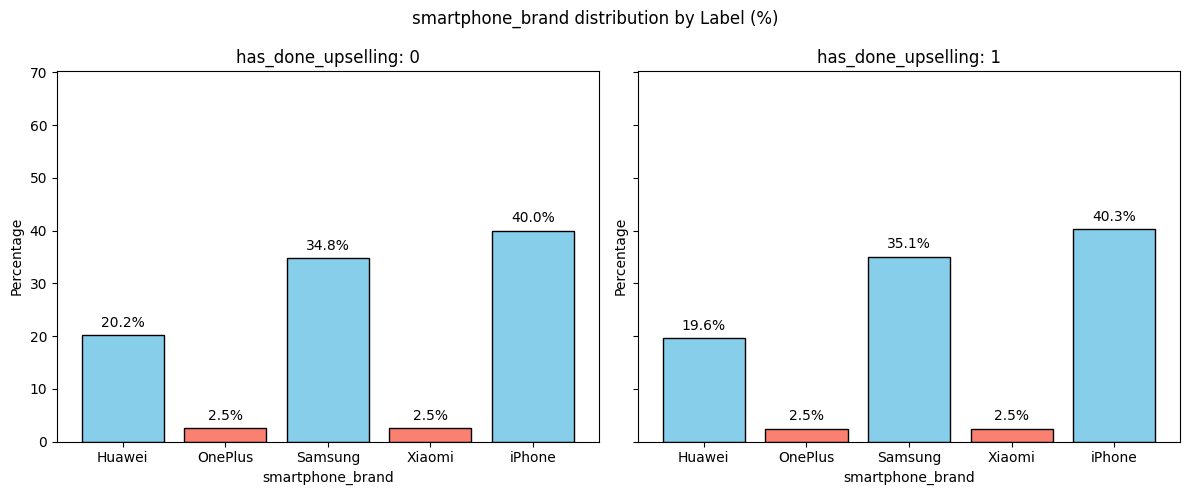

In [30]:
calculate_distribution_with_label(core_data, 'smartphone_brand')

### Available GB distribution

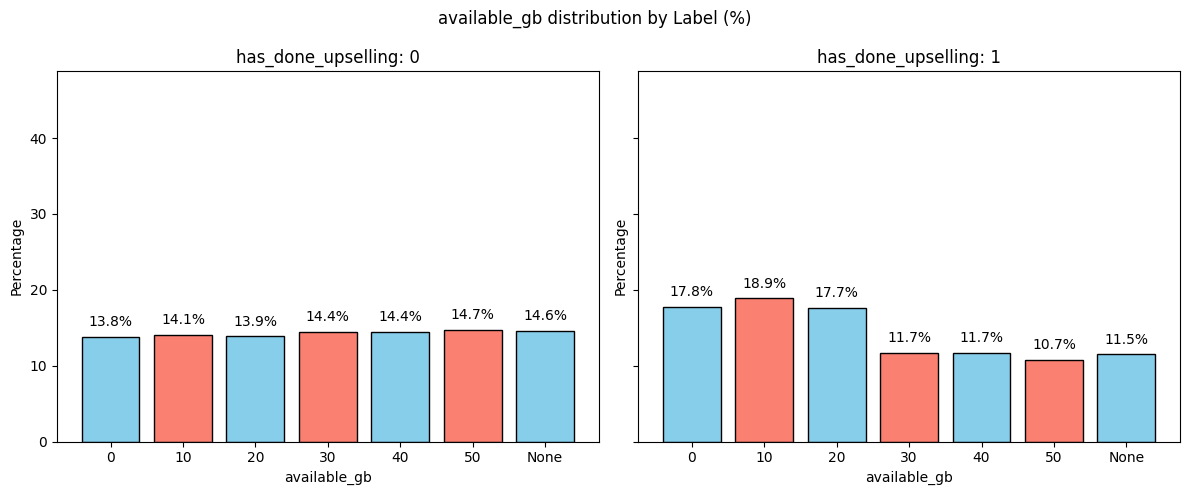

In [31]:
core_data['available_gb'] = core_data['available_gb'].astype(str)
calculate_distribution_with_label(core_data, 'available_gb')

### Gross MRC band distribution

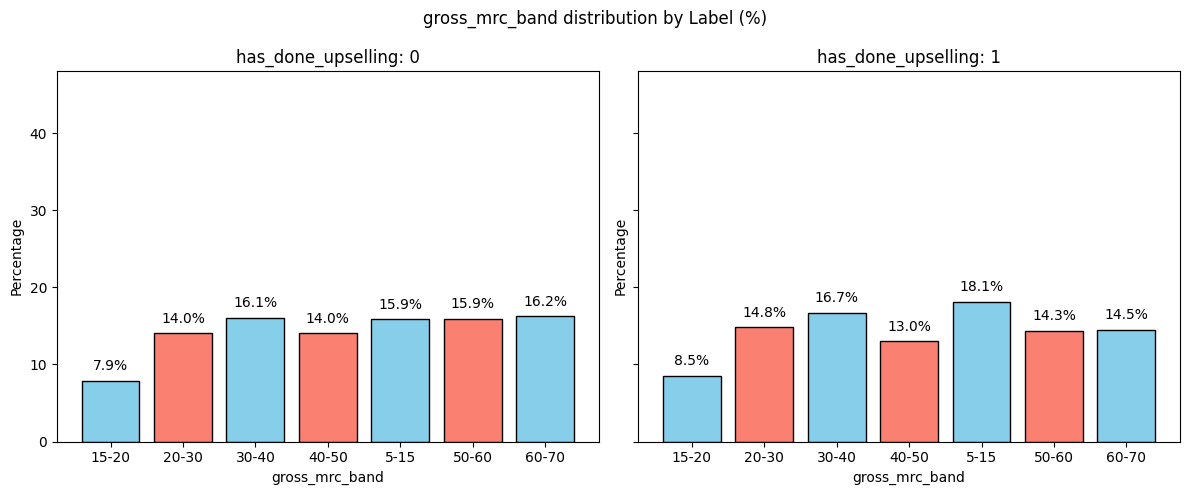

In [32]:
conditions_gmrc = [
    (core_data['gross_mrc'] >= 5) & (core_data['gross_mrc'] < 15),
    (core_data['gross_mrc'] >= 15) & (core_data['gross_mrc'] < 20),
    (core_data['gross_mrc'] >= 20) & (core_data['gross_mrc'] < 30),
    (core_data['gross_mrc'] >= 30) & (core_data['gross_mrc'] < 40),
    (core_data['gross_mrc'] >= 40) & (core_data['gross_mrc'] < 50),
    (core_data['gross_mrc'] >= 50) & (core_data['gross_mrc'] < 60),
    (core_data['gross_mrc'] >= 60) & (core_data['gross_mrc'] <= 70),
]

choices_gmrc = ['5-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60-70']

core_data['gross_mrc_band'] = np.select(conditions_gmrc, choices_gmrc, default='Unknown')

calculate_distribution_with_label(core_data, 'gross_mrc_band')

### Contract lifetime 

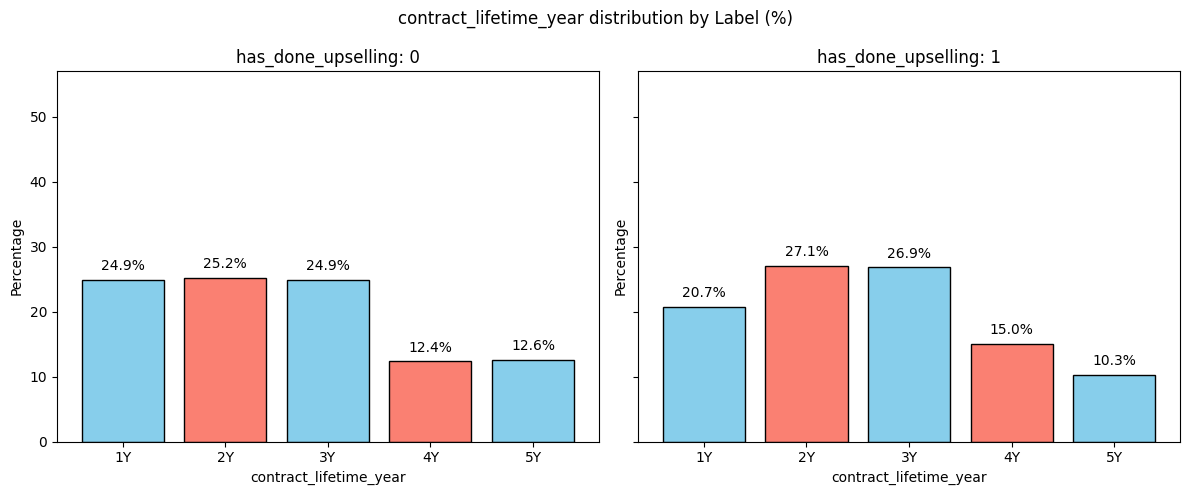

In [33]:
core_data['contract_lifetime_days_int'] = core_data['contract_lifetime_days'].astype(int)
conditions_contract_lifetime = [
    (core_data['contract_lifetime_days_int'] > 0) & (core_data['contract_lifetime_days_int'] <= 365),
    (core_data['contract_lifetime_days_int'] > 365) & (core_data['contract_lifetime_days_int'] <= 2*365),
    (core_data['contract_lifetime_days_int'] > 2*365) & (core_data['contract_lifetime_days_int'] <= 3*365),
    (core_data['contract_lifetime_days_int'] > 3*365) & (core_data['contract_lifetime_days_int'] <= 4*365),
    (core_data['contract_lifetime_days_int'] > 4*365) & (core_data['contract_lifetime_days_int'] <= 5*365)
]

choices_contract_lifetime = ['1Y', '2Y', '3Y', '4Y', '5Y']

core_data['contract_lifetime_year'] = np.select(conditions_contract_lifetime, choices_contract_lifetime, default='Unknown')

calculate_distribution_with_label(core_data, 'contract_lifetime_year')